### The random forest classification method is a way of using our dataset in order to classify observations based on their different attributes. The random forest method is similar to the decision tree method, but for this method, the random forest will run many different decision trees in order to opimize our trees and find our best model. For this analysis, we will use two datasets to begin with, which are NSL KDD datasets. These revolve around data that was collected based on data revolving around network traffic.

In [1]:
import csv

In [2]:
import os

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import matplotlib as plt

In [139]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
os.chdir("/Users/JackVoigt/Documents/MSIA Files")

In [8]:
os.getcwd()

'/Users/JackVoigt/Documents/MSIA Files'

In [9]:
df1 = pd.read_csv("nslkdd-version1.csv")

In [10]:
df2 = pd.read_csv("nslkdd-version2.csv")

In [11]:
pd.set_option('display.max_columns', None)

In [12]:
pd.set_option('display.max_rows', None)

### We are interested in each of these network traffic observations, primarily what kind of traffic types they fall under. We can compare these datasets to take a look at their similarities and differences in order to decide what data out of these datasets will be used in our analysis.

In [13]:
df1.head()

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16,a17,a18,a19,a20,a21,a22,a23,a24,a25,a26,a27,a28,a29,a30,a31,a32,a33,a34,a35,a36,a37,a38,a39,a40,a41,a42
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [14]:
df2.head()

,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16,a17,a18,a19,a20,a21,a22,a23,a24,a25,a26,a27,a28,a29,a30,a31,a32,a33,a34,a35,a36,a37,a38,a39,a40,a41,a42
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0


In [15]:
index1 = df1.index
number_of_rows1 = len(index1)
print(number_of_rows1)

index2 = df2.index
number_of_rows2 = len(index2)
print(number_of_rows2)

25192
25192


### We can take a look at the head of each of our datasets here as well as the total number of observations. We see that each dataset includes 25,192 observations in each dataset. 

In [16]:
df1.shape

(25192, 42)

In [17]:
df2.shape

(25192, 36)

### After taking a look at the number of rows and the shape of each of these datatses, we see they have the same number of observations at 25192, but a different amount of variables, with the first dataset having 42 and the second dataset having 36. We can also see from the head function we ran previously, that our df2 is missing columns that we believe will be valuable in our random forest for classification. The second dataframe is missing the first 6 columns that have descriptitve values, as well as the column shown in the first dataset that tells us the type of traffic that observation belongs to. The second dataframe does not possess a column that is good for calssification.

In [18]:
df1.isna().sum()

a1     0
a2     0
a3     0
a4     0
a5     0
a6     0
a7     0
a8     0
a9     0
a10    0
a11    0
a12    0
a13    0
a14    0
a15    0
a16    0
a17    0
a18    0
a19    0
a20    0
a21    0
a22    0
a23    0
a24    0
a25    0
a26    0
a27    0
a28    0
a29    0
a30    0
a31    0
a32    0
a33    0
a34    0
a35    0
a36    0
a37    0
a38    0
a39    0
a40    0
a41    0
a42    0
dtype: int64

In [19]:
df2.isna().sum()

a7     0
a8     0
a9     0
a10    0
a11    0
a12    0
a13    0
a14    0
a15    0
a16    0
a17    0
a18    0
a19    0
a20    0
a21    0
a22    0
a23    0
a24    0
a25    0
a26    0
a27    0
a28    0
a29    0
a30    0
a31    0
a32    0
a33    0
a34    0
a35    0
a36    0
a37    0
a38    0
a39    0
a40    0
a41    0
a42    0
dtype: int64

### We can run a function to return the number of na values for each dataframe, of which there are none. Both of these datasets are complete. Next, we can look at the types of data found in each of our dataframes. 

In [20]:
df1.dtypes

a1       int64
a2      object
a3      object
a4      object
a5       int64
a6       int64
a7       int64
a8       int64
a9       int64
a10      int64
a11      int64
a12      int64
a13      int64
a14      int64
a15      int64
a16      int64
a17      int64
a18      int64
a19      int64
a20      int64
a21      int64
a22      int64
a23      int64
a24      int64
a25    float64
a26    float64
a27    float64
a28    float64
a29    float64
a30    float64
a31    float64
a32      int64
a33      int64
a34    float64
a35    float64
a36    float64
a37    float64
a38    float64
a39    float64
a40    float64
a41    float64
a42     object
dtype: object

In [21]:
df2.dtypes

a7       int64
a8       int64
a9       int64
a10      int64
a11      int64
a12      int64
a13      int64
a14      int64
a15      int64
a16      int64
a17      int64
a18      int64
a19      int64
a20      int64
a21      int64
a22      int64
a23      int64
a24      int64
a25    float64
a26    float64
a27    float64
a28    float64
a29    float64
a30    float64
a31    float64
a32      int64
a33      int64
a34    float64
a35    float64
a36    float64
a37    float64
a38    float64
a39    float64
a40    float64
a41    float64
a42      int64
dtype: object

### Here we see the data types of all of the columns in each of our dataset, and we can see that the second dataframe is missing some of the object data type columns that are included in the first dataframe. Because of these differences and lack of certain data in the second dataframe, we will use the first dataframe in our classification. It is more useful because of its inclusion of these categorical variables that the second dataframe lacks. We can take a look at value counts for some of the missing columns from dataframe 2 to better understand the columns that only our dataframe 1 includes.

In [22]:
df1["a2"].value_counts()

tcp     20526
udp      3011
icmp     1655
Name: a2, dtype: int64

In [23]:
df1["a3"].value_counts()

http           8003
private        4351
domain_u       1820
smtp           1449
ftp_data       1396
eco_i           909
other           858
ecr_i           613
telnet          483
finger          366
ftp             345
auth            189
Z39_50          172
courier         164
uucp            157
time            155
bgp             146
whois           145
imap4           138
uucp_path       133
iso_tsap        131
ctf             127
urp_i           124
nnsp            123
supdup          114
http_443        113
csnet_ns        111
efs             110
gopher          109
domain          109
vmnet           107
daytime         107
discard         105
hostnames        96
name             92
klogin           92
exec             91
ldap             90
mtp              90
systat           88
link             85
netbios_dgm      85
login            79
netstat          78
netbios_ns       76
sunrpc           67
netbios_ssn      67
kshell           67
echo             65
nntp             61


In [24]:
df1["a4"].value_counts()

SF        14973
S0         7009
REJ        2216
RSTR        497
RSTO        304
S1           88
SH           43
RSTOS0       21
S2           21
S3           15
OTH           5
Name: a4, dtype: int64

In [25]:
df1["a5"].value_counts()

0            9866
8             738
1             480
44            467
45            416
1032          390
46            284
43            231
147           210
105           204
28            188
54540         180
42            156
520           140
30            132
146           130
334           128
18            114
215           105
216            92
224            88
213            76
210            74
227            73
226            72
516            71
225            71
221            70
214            69
207            69
209            69
145            66
229            65
222            65
219            65
217            62
306            62
245            61
220            61
231            61
235            60
218            60
201            60
309            58
237            58
308            58
232            57
230            57
212            57
307            57
208            56
192            56
211            56
312            55
316            55
205       

In [26]:
df1["a6"].value_counts()

0          13574
105          309
8314         175
44           115
42           105
330          105
332          103
331           97
4             94
329           88
328           86
45            83
333           83
46            80
147           78
334           74
146           72
130           71
327           61
335           56
4152          55
128           54
132           53
75            48
336           46
74            45
43            44
337           44
133           44
131           42
326           42
76            41
72            40
73            40
145           39
2698          39
135           37
127           37
70            36
1380          35
71            35
3222          35
48            34
129           32
78            32
136           31
138           31
77            30
325           30
126           28
2507          28
310           26
1075          26
255           25
139           24
296           24
134           24
406           23
137           

### Now we can take a look at the column that includes values for the type of data that are found in each observation.

In [27]:
df1["a42"].value_counts()

normal             13449
neptune             8282
ipsweep              710
satan                691
portsweep            587
smurf                529
nmap                 301
back                 196
teardrop             188
warezclient          181
pod                   38
guess_passwd          10
warezmaster            7
buffer_overflow        6
imap                   5
rootkit                4
phf                    2
multihop               2
loadmodule             1
spy                    1
ftp_write              1
land                   1
Name: a42, dtype: int64

### Now that we know we want to only work with the first dataset because of some of the variables it includes, we can begin talking about this dataset specifically. We already checked this dataset for null values and we saw there were none. Now we can look at the variables themselves. 

In [28]:
df1["a7"].value_counts()

0    25190
1        2
Name: a7, dtype: int64

### A variable like this does not help us in our eventual random forest analysis because almost every single one of these observations contains the same value. For this reason, this column does not help us differentiate between observations and can be dropped. We can look at other columns like this and drop them if we feel like they do not aid in our analysis.

### Below is the line where we ran functions to find different columns that had entirely all the same values or nearly all the same values. We can drop all of these columns from our dataframe and continue.

In [29]:
df1["a42"].value_counts()

normal             13449
neptune             8282
ipsweep              710
satan                691
portsweep            587
smurf                529
nmap                 301
back                 196
teardrop             188
warezclient          181
pod                   38
guess_passwd          10
warezmaster            7
buffer_overflow        6
imap                   5
rootkit                4
phf                    2
multihop               2
loadmodule             1
spy                    1
ftp_write              1
land                   1
Name: a42, dtype: int64

In [30]:
df1 = df1.drop(columns=['a7',"a8","a9","a10","a11","a13","a14","a15","a16","a17","a18","a19","a20","a21","a22"])

In [31]:
df1.head()

,a1,a2,a3,a4,a5,a6,a12,a23,a24,a25,a26,a27,a28,a29,a30,a31,a32,a33,a34,a35,a36,a37,a38,a39,a40,a41,a42
0,0,tcp,ftp_data,SF,491,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,1,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,1,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


### To help fit our data we need to work with our string variables to make them more machine learning friendly. This can include slimming down categorical variables or converting them to numerical variables. 

In [32]:
df1["a2"].value_counts()

tcp     20526
udp      3011
icmp     1655
Name: a2, dtype: int64

In [33]:
df1['a2'] = df1['a2'].factorize()[0]

In [34]:
df1["a2"] = df1['a2'].astype('float64')

In [35]:
df1["a2"].value_counts()

0.0    20526
1.0     3011
2.0     1655
Name: a2, dtype: int64

### Above we run a function to numerically factorize our column "a2", which assigns a number to each level of this categorical variable. We can do this to other columns as well to help our data work better with our random forest model.

In [36]:
df1["a3"] = df1['a3'].astype('category')

In [52]:
df1['a3'] = df1['a3'].factorize()[0]

In [38]:
df1["a3"] = df1['a3'].astype('float64')

In [53]:
df1["a3"].value_counts()

3    7923
2    4288
5    1820
6    1420
0    1384
4     909
1     856
7     613
Name: a3, dtype: int64

In [50]:
# Get the count of each value
value_countsa3 = df1['a3'].value_counts()

# Select the values where the count is less than 3 (or 5 if you like)
to_removea3 = value_countsa3[value_countsa3 <= 500].index

# Keep rows where the city column is not in to_remove
df1 = df1[~df1.a3.isin(to_removea3)]

In [54]:
df1['a3'] = df1['a3'].factorize()[0]

In [55]:
df1["a3"].value_counts()

3    7923
2    4288
5    1820
6    1420
0    1384
4     909
1     856
7     613
Name: a3, dtype: int64

In [41]:
df1.dtypes

a1       int64
a2     float64
a3     float64
a4      object
a5       int64
a6       int64
a12      int64
a23      int64
a24      int64
a25    float64
a26    float64
a27    float64
a28    float64
a29    float64
a30    float64
a31    float64
a32      int64
a33      int64
a34    float64
a35    float64
a36    float64
a37    float64
a38    float64
a39    float64
a40    float64
a41    float64
a42     object
dtype: object

In [56]:
df1["a4"].value_counts()

SF      14138
S0       3130
REJ      1527
RSTR      418
Name: a4, dtype: int64

In [43]:
value_countsa4 = df1['a4'].value_counts()
to_removea4 = value_countsa4[value_countsa4 <= 400].index
df1 = df1[~df1.a4.isin(to_removea4)]

In [59]:
df1['a4'] = df1['a4'].factorize()[0]

In [61]:
df1["a3"] = df1['a3'].astype('float64')

In [62]:
df1["a4"].value_counts()

0    14138
1     3130
2     1527
3      418
Name: a4, dtype: int64

In [77]:
df1["a42"].value_counts()

0    12513
1     3549
3      682
7      651
8      529
4      479
6      259
9      192
5      188
2      123
Name: a42, dtype: int64

In [64]:
value_countsa42 = df1['a42'].value_counts()
to_removea42 = value_countsa42[value_countsa42 <= 100].index
df1 = df1[~df1.a42.isin(to_removea42)]

In [76]:
df1['a42'] = df1['a42'].factorize()[0]

In [78]:
df1["a42"] = df1['a42'].astype('float64')

### We have now slimmed down our data to only variables we believe will help us classify obserations. 

### Our dataframe is clear of null values and has had unneccesary columns removed, the data itself is ready to begin building a random forest model. This model will help us classify at our a42 model, as we can train and build a model and perform other functions to optimize our model. We have now releveled all of our string variables so all of these categories take on a numeric value in place of their old string value. This is done for our machine learning model because it can not intuitively decide what each category means.

### We can partition our dataset into training and testing datasets, which each include all of our variables, or "features", and all of our target variable values, or "labels". We can check the shape of these objects to make sure the functions were run corectly.

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
from sklearn.ensemble import RandomForestClassifier

In [132]:
X = df1.iloc[:, 0:26].values
y = df1.iloc[:, 26].values

### Now we can train our random forest model on our train dataset and our test dataset. We create both a train and test for our explantory variables and our classification variable.

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [141]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

### Now that we have built the model, we can run functions to check the accuracy of the model at different measurements. We can build a confusion matrix that can give us insights into the accuracy, specificity and sensitivity. This tells us how well our trained model vs our predicted values for our test data and compare the results. 

In [142]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [143]:
print(confusion_matrix(y_test,y_pred))

[[2513    0    1    0    0    0    0    1    0    0]
 [   0  706    0    0    0    0    0    0    0    0]
 [   1    0   33    0    0    0    0    0    0    0]
 [   0    0    0  128    0    0    1    0    0    0]
 [   0    0    0    0   94    0    0    0    0    0]
 [   0    0    0    0    0   43    0    0    0    0]
 [   3    0    0    1    0    0   48    0    0    0]
 [   1    0    0    0    1    0    0  125    0    0]
 [   1    0    0    0    0    0    0    0   90    0]
 [   1    0    0    0    0    0    0    0    0   41]]


In [144]:
print(accuracy_score(y_test, y_pred))

0.9968692929819984


In [145]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2515
         1.0       1.00      1.00      1.00       706
         2.0       0.97      0.97      0.97        34
         3.0       0.99      0.99      0.99       129
         4.0       0.99      1.00      0.99        94
         5.0       1.00      1.00      1.00        43
         6.0       0.98      0.92      0.95        52
         7.0       0.99      0.98      0.99       127
         8.0       1.00      0.99      0.99        91
         9.0       1.00      0.98      0.99        42

    accuracy                           1.00      3833
   macro avg       0.99      0.98      0.99      3833
weighted avg       1.00      1.00      1.00      3833



### We can tell from our confusion matrix that this model is very accurate, with a 99% accuracy score. From this, we can tell this model performs very well in prediciting the type of traffic that each of these observations falls under. There are only a handful of observations from our large dataset that were predicted incorrectly 

### Now we can run functions to find out which of our variables show the most or least importance in our model in predicting what kind of traffic these observations fall under. 

In [146]:
rf.feature_importances_

array([0.00179582, 0.05913416, 0.04434856, 0.04177328, 0.14722416,
       0.03961491, 0.009985  , 0.0368519 , 0.02988446, 0.05723072,
       0.0475808 , 0.01970612, 0.00667715, 0.10455533, 0.05171536,
       0.00453235, 0.02052639, 0.02788948, 0.03520688, 0.02639277,
       0.02779328, 0.04497859, 0.04978525, 0.03331742, 0.01674459,
       0.01475527])

In [176]:
features=df1.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]]
importances = rf.feature_importances_
indices = np.argsort(importances)

Text(0.5, 0, 'Relative Importance')

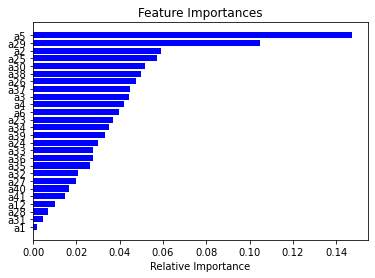

In [177]:
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

### We can tell from this histogram that our most important variables are a5, a29, and a2. Our least important variables are a1, a31, and a28. If our model was not as accurate as it is, we could explore dropping some of our variables to achieve a higher accuracy score in our model. Because we already dropped variables that we explored and used intuition ot decide they were insignificant, we can retain all of our variables because our accuracy score is so high. If we kept the variables from earlier that had very imbalanced distributions, we might not have seen such a high accuracy score. For these reasons, we can keep all the remaining variables because we have such a strong model.